# Исследовать данные из файла data.csv по схеме последнего занятия. Выбрать столбцы с номерами : с N1=ваш номер в списке*10 по N2=ваш номер в списке*10+9. Построить регрессию с данными из ts.csv 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Выбрать столбцы с номерами : с N1=ваш номер в списке*10 по N2=ваш номер в списке*10+9.
Мой номер в списке - 2 

In [32]:
N1 = 2 * 10
N2 = 2 * 10 + 9

Прочитаем данные из таблицы и посмотрим их

In [33]:
data = pd.read_csv('xdata.csv', sep=";")

In [34]:
data.head()

,Timestamp,610FI001.DACA.PV,610FI005.DACA.PV,610FI015.DACA.PV,610FI017A.PV,610FI017B.PV,610FI017C.PV,610FI020.PV,610FI023A.PV,610FI023B.PV,...,Param1,Param2,Param3,Param4,Param5,Param6,Param7,Param8,Param9,Param10
0,2018-09-28 20:00:00,6767.059487,3915.980352,6488.320318,7378.070513,7401.434551,7368.363223,235425.40625,37094.747564,41896.374375,...,102.480702,999.576371,1002.109174,11.380535,10.892793,77.732925,0.0,51.094552,48.905448,0.0
1,2018-09-29 08:00:00,6765.877464,1327.084508,6491.123816,7378.806800,7398.244902,7363.662715,235425.40625,36857.208869,42294.850312,...,102.480702,999.576371,1002.109174,11.380908,10.889553,77.736564,0.0,51.094552,48.905448,0.0
2,2018-09-29 20:15:00,6770.346529,6255.144424,6486.659397,7379.145501,7398.580645,7364.334297,235425.40625,37815.427267,42395.268750,...,102.480702,999.576371,1002.109174,11.377843,10.888383,77.734026,0.0,51.094552,48.905448,0.0
3,2018-09-30 08:00:00,6775.414762,274.236670,6501.651024,7378.688996,7426.280020,7392.369297,235425.40625,37709.016759,43039.450156,...,102.480702,999.576371,1002.109174,11.378230,10.891634,77.726824,0.0,51.094552,48.905448,0.0
4,2018-09-30 20:00:00,6775.592058,2045.991153,6516.385240,7377.996880,7382.128965,7347.546758,235425.40625,38053.489369,42279.893906,...,102.480702,999.576371,1002.109174,11.380795,10.888861,77.726054,0.0,51.094552,48.905448,0.0


In [35]:
mydata = data.iloc[:, N1:N2+1].copy()
mydata.head()

,610FI025.DACA.PV,610FI026A.DACA.PV,610FI026B.DACA.PV,610FI027.DACA.PV,610FI028.DACA.PV,610FI029.DACA.PV,610FI030A.DACA.PV,610FI030B.DACA.PV,610FI031.DACA.PV,610FI032.DACA.PV
0,0.042452,1.496806e+06,936432.675000,124.521033,4029.501991,48631.008504,1513277.755,890745.5525,131.194077,2801.003047
1,0.035904,1.443839e+06,936497.553571,124.896542,4013.905075,48955.636652,1496045.985,890738.9850,130.915292,2800.187314
2,-0.157742,1.464177e+06,936492.046429,123.532191,4006.595378,48538.576540,1502254.655,890684.8700,130.869471,2739.189365
3,0.045741,1.417856e+06,936412.112500,125.140966,4007.708646,49367.505112,1529879.160,890680.6475,131.737152,2713.909795
4,-0.021198,1.489132e+06,936313.558929,124.270013,4009.450654,49235.329621,1453059.295,890678.5925,131.188196,2697.530576


In [36]:
mydata

,610FI025.DACA.PV,610FI026A.DACA.PV,610FI026B.DACA.PV,610FI027.DACA.PV,610FI028.DACA.PV,610FI029.DACA.PV,610FI030A.DACA.PV,610FI030B.DACA.PV,610FI031.DACA.PV,610FI032.DACA.PV
0,0.042452,1.496806e+06,936432.675000,124.521033,4029.501991,48631.008504,1.513278e+06,890745.5525,131.194077,2801.003047
1,0.035904,1.443839e+06,936497.553571,124.896542,4013.905075,48955.636652,1.496046e+06,890738.9850,130.915292,2800.187314
2,-0.157742,1.464177e+06,936492.046429,123.532191,4006.595378,48538.576540,1.502255e+06,890684.8700,130.869471,2739.189365
3,0.045741,1.417856e+06,936412.112500,125.140966,4007.708646,49367.505112,1.529879e+06,890680.6475,131.737152,2713.909795
4,-0.021198,1.489132e+06,936313.558929,124.270013,4009.450654,49235.329621,1.453059e+06,890678.5925,131.188196,2697.530576
...,...,...,...,...,...,...,...,...,...,...
1138,0.000000,1.913927e+06,629635.875000,123.926000,2403.733474,24728.990000,1.260737e+06,712407.7500,129.379256,2315.122800
1139,0.000000,1.443611e+06,629635.875000,124.074615,2416.780140,24728.990000,1.265265e+06,712407.7500,129.225302,2317.210400
1140,0.000000,1.245165e+06,629635.875000,123.495538,2435.366211,24728.990000,1.272691e+06,712407.7500,128.816093,2310.419600
1141,0.000000,1.270334e+06,629635.875000,123.968462,2455.450982,24728.990000,1.263824e+06,712407.7500,129.131256,2162.208400


Посмотрим характеристики данных по столбцам

In [53]:
mydata.describe()

,610FI025.DACA.PV,610FI026A.DACA.PV,610FI026B.DACA.PV,610FI027.DACA.PV,610FI028.DACA.PV,610FI029.DACA.PV,610FI030A.DACA.PV,610FI030B.DACA.PV,610FI031.DACA.PV,610FI032.DACA.PV
count,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000
mean,0.149929,1.436265e+06,726296.729386,124.389220,3165.220292,42225.999778,1.183433e+06,758547.698517,130.549219,2755.958672
std,0.206221,2.143566e+05,73470.911671,1.070561,682.175755,10478.241490,2.971649e+05,95636.018851,0.892858,359.535620
min,-0.157742,8.462697e+05,585132.880000,118.942462,2393.133965,24315.129200,5.265794e+05,581955.140000,127.898465,2162.208400
25%,0.000000,1.272071e+06,629635.875000,123.865615,2691.964386,35638.714886,9.660713e+05,712407.750000,130.120349,2444.408800
50%,0.043000,1.426237e+06,772743.060000,124.375692,2870.808316,41970.679771,1.182083e+06,712407.750000,130.533581,2755.061200
75%,0.241067,1.578376e+06,772743.060000,124.910154,3280.201561,48723.265743,1.321947e+06,890667.037500,130.996791,2965.933200
max,0.810000,2.072829e+06,936497.553571,135.059385,4929.246702,60062.828000,1.932114e+06,890745.552500,140.990791,3771.896000


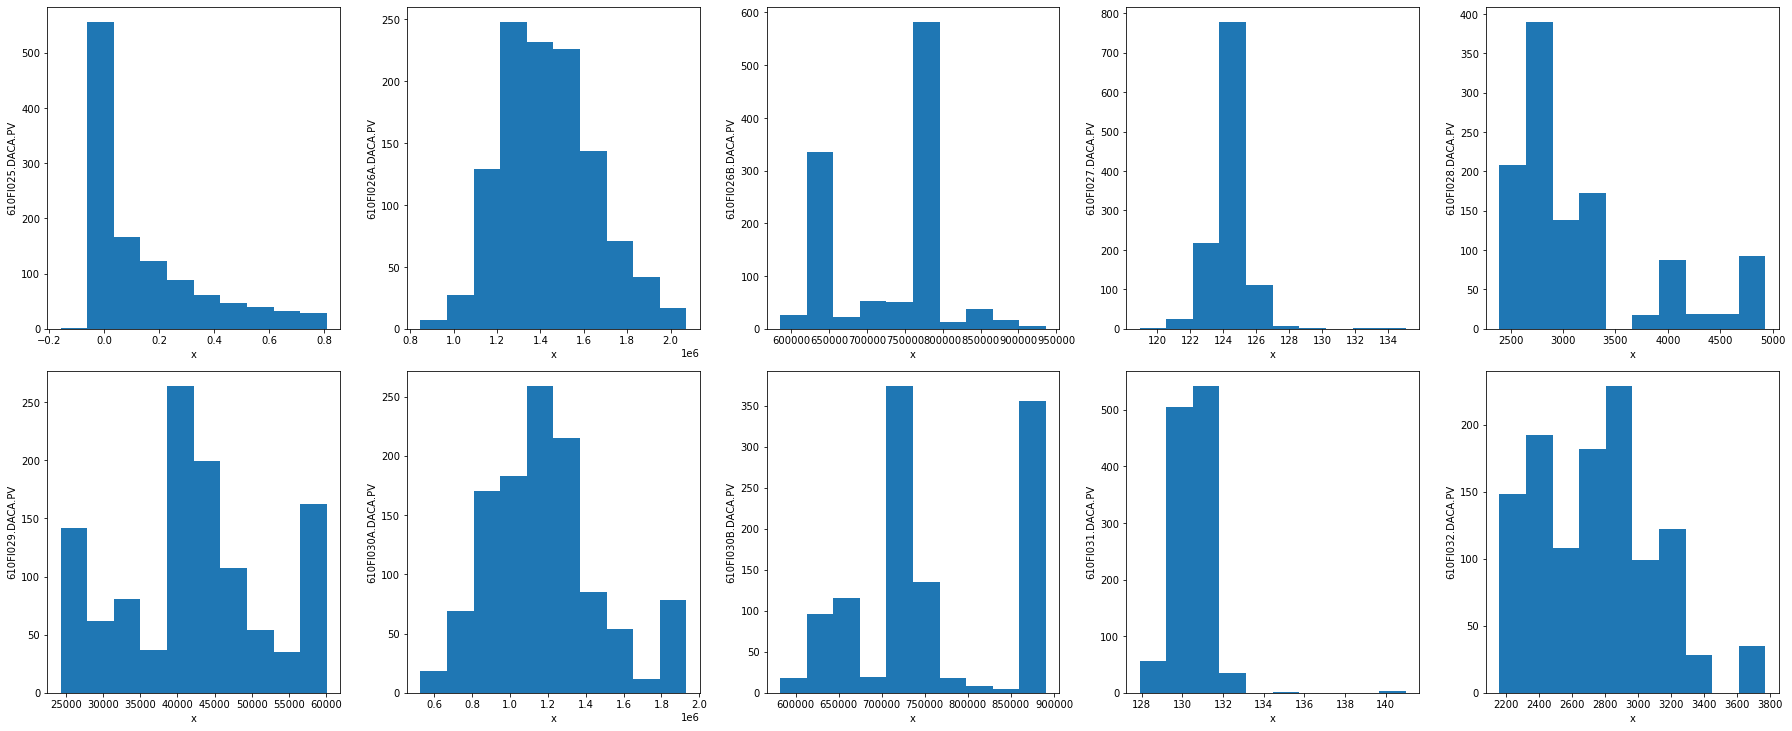

In [37]:
plt.figure(figsize=(25, 25))
i = 1
for column_name, column_series in mydata.iteritems():
    plt.subplot(5, 5, i)
    plt.hist(mydata[column_name])
    plt.xlabel('x')
    plt.ylabel(column_name)
    plt.tight_layout()
    i+=1

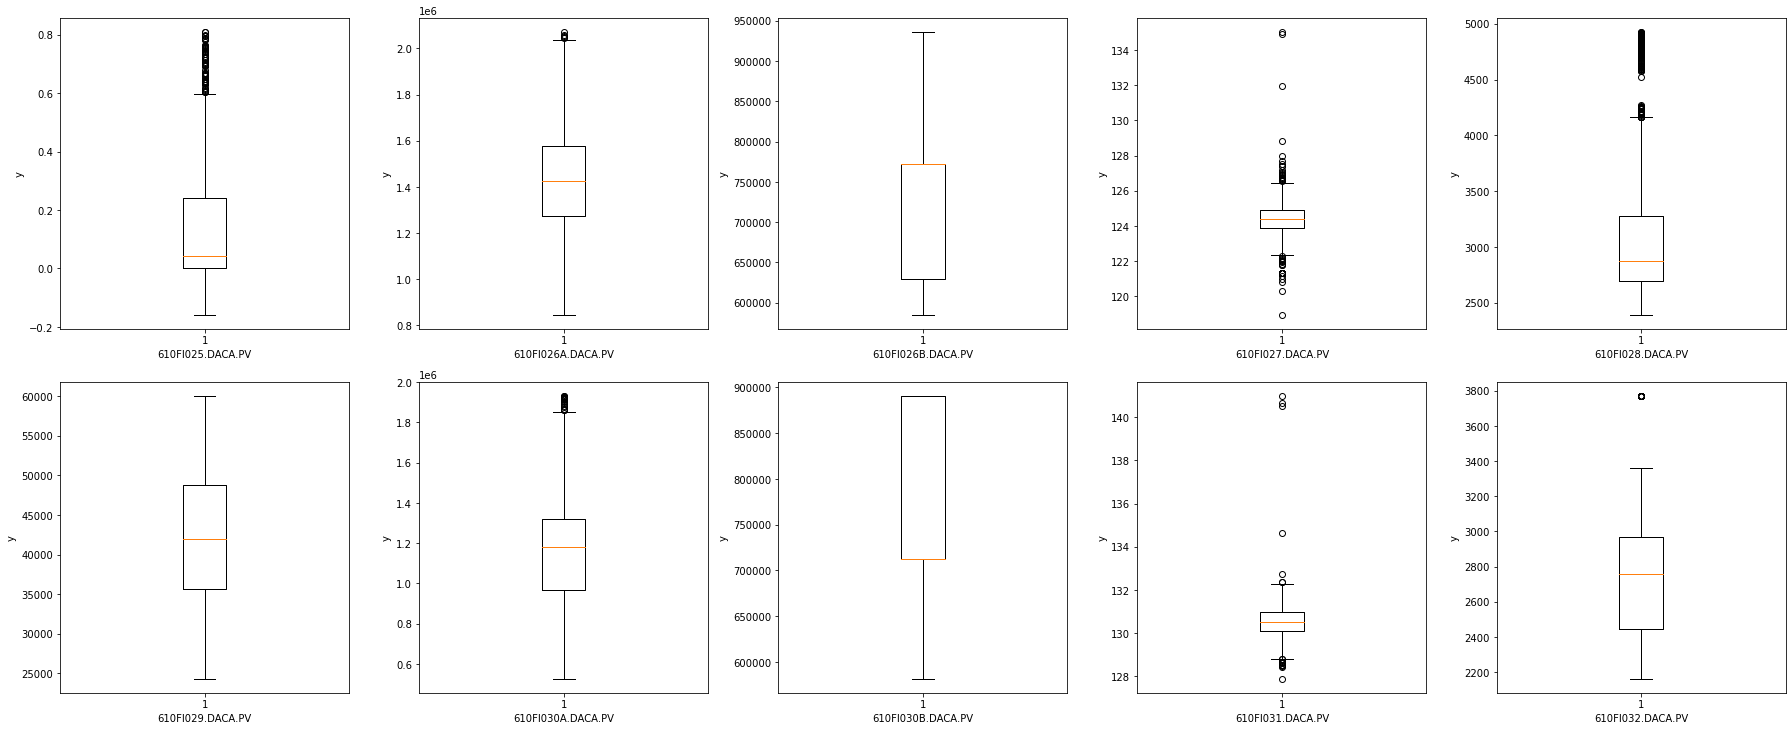

In [38]:
plt.figure(figsize=(25, 25))
i = 1
for column_name, column_series in mydata.iteritems():
    plt.subplot(5, 5, i)
    plt.boxplot(mydata[column_name])
    plt.xlabel(column_name)
    plt.ylabel('y')
    plt.tight_layout()
    i+=1

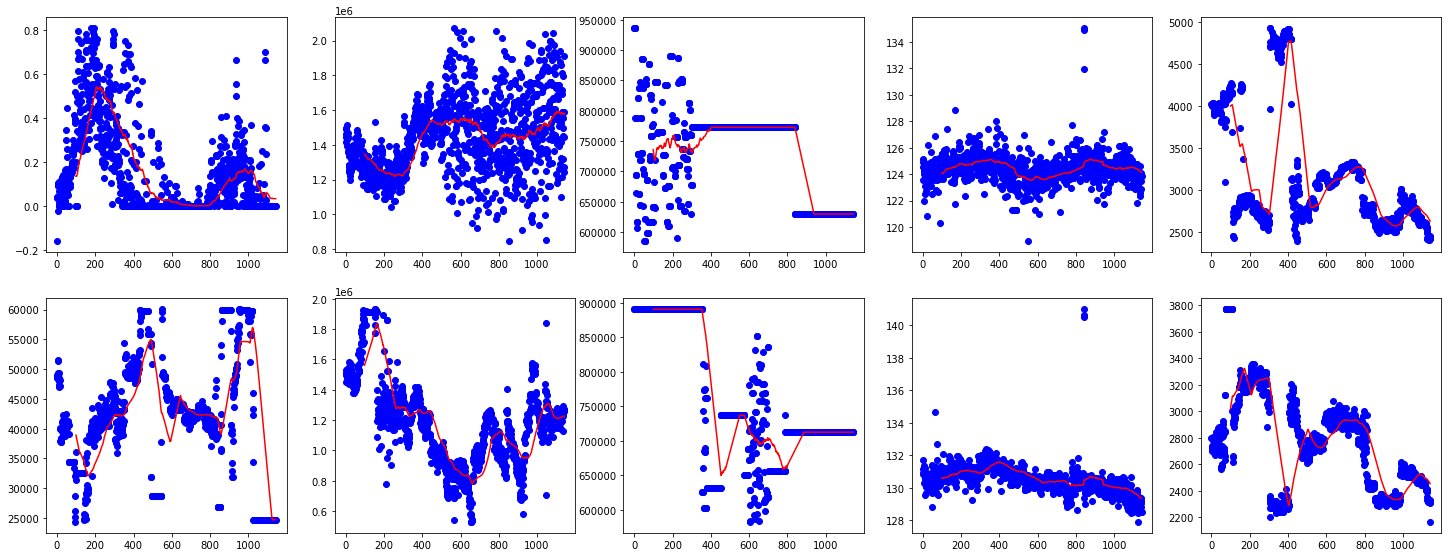

In [70]:
i=1
plt.figure(figsize=(25, 25))
for coloumn in mydata.columns:
    plt.subplot(5, 5, i)
    plt.scatter(range(mydata.shape[0]), mydata[coloumn], color = 'blue')
    plt.plot(mydata[coloumn].rolling(window=100).mean(), color = 'red')
    i+=1

Как мы можем заметить по графикам - данные достаточно шумные. Особенно ярко это выражено в столбцах с именами: 610FI025.DACA.PV 610FI027.DACA.PV 610FI028.DACA.PV 610FI031.DACA.PV - большое количество выбросов, которое можно заметить по графикам боксплота и матрицам рассеяния. Общий тренд показан красной линией.

Прочитаем данные из таблицы ts.csv - нам необходим только второй столбец, он для нас будет таргетом.

In [71]:
target = pd.read_csv('ts.csv', sep=";")
target = target.iloc[:, 1:2].copy()

# Построим модели регрессий

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mydata, target)

In [73]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test
predicted.reshape(-1)
expected = expected.to_numpy().reshape(-1)

In [74]:
from sklearn.metrics import r2_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import mean_absolute_error

MAE=sum(abs(predicted - expected))/ len(y_test)
MSQERR=sum((predicted - expected)**2)/len(y_test)

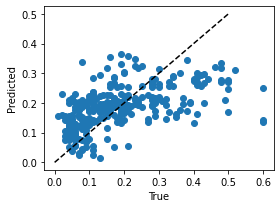

In [75]:
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 0.5], [0, 0.5], '--k')
plt.axis('tight')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.tight_layout()

In [76]:
r2_score(predicted, expected)

-1.362540189940595

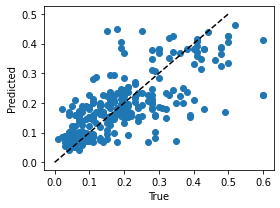

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
clf1 = GradientBoostingRegressor()
clf1.fit(X_train, y_train.values.ravel())
predicted = clf1.predict(X_test)
expected = y_test
expected = expected.to_numpy().reshape(-1)
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 0.5], [0, 0.5], '--k')
plt.axis('tight')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.tight_layout()

In [78]:
r2_score(predicted, expected)

0.24579804039515607

In [79]:
MAE=sum(abs(predicted - expected))/ len(y_test)
MSQERR=sum((predicted - expected)**2)/len(y_test)
print('Gradient boosting: MAE=',MAE, 'MSQERR=', MSQERR )

Gradient boosting: MAE= 0.06289374072666562 MSQERR= 0.00793444674962454


In [80]:
MAE=sum(abs(predicted - expected))/ len(y_test)
MSQERR=sum((predicted - expected)**2)/len(y_test)
print('Lin regression: MAE=',MAE, 'MSQERR=', MSQERR )

Lin regression: MAE= 0.06289374072666562 MSQERR= 0.00793444674962454
